## DSCI 100 - Introduction to Data Science


### Lecture 9 - Introduction to linear regression

#### 2019-03-13

## News and reminders

- Tuesday, March 19th - in class peer review session

- Friday, April 26th at 19:00 - Final exam (format TBD)

### Regression prediction problem

What if we want to predict a quantitative value instead of a class label? 

<img align="left" src="https://ubc-dsci.github.io/introduction-to-datascience/bookdown-demo_files/figure-html/eda-1.png" width="500"/>

Today we will focus on another regression approach - linear regression.

For example, the price of a 2000 square foot home (from this reduced data set):

<img align="left" src="https://ubc-dsci.github.io/introduction-to-datascience/bookdown-demo_files/figure-html/small_eda-1.png" width="500"/>

### linear regression

First we find the line of "best-fit" through the data points:


<img align="left" src="https://ubc-dsci.github.io/introduction-to-datascience/bookdown-demo_files/figure-html/linReg1-1.png" width="500"/>

### linear regression

How do we choose the line of "best fit"? We can draw many lines through the data:

<img align="left" src="https://ubc-dsci.github.io/introduction-to-datascience/bookdown-demo_files/figure-html/severalLines-1.png" width="500"/>

### linear regression

We choose the line that minimzes the **average** vertical distance between itself and each of the observed data points

<img align="left" src="https://ubc-dsci.github.io/introduction-to-datascience/bookdown-demo_files/figure-html/verticalDistToMin-1.png" width="500"/>

### Linear vs k-nn regression

<img align="left" src="https://ubc-dsci.github.io/introduction-to-datascience/bookdown-demo_files/figure-html/compareRegression-1.png" width="1000"/>

### Why linear regression?

Advantages to restricting the model to straight line: interpretability!

Remembering that the equation for a straight line is: $Y = \beta_0 + \beta_1X$

Where:
- $\beta_0$ is the y-intercept of the line (the value where the line cuts the y-axis)
- $\beta_1$ is the slope of the line



We can then write: 

$house\: price = \beta_0 + \beta_1house\: size$

And finally, fill in the values for $\beta_0$ and $\beta_1$:

$house\: price = -64542.2 + 175.9*house\: size$

*k-nn regression, as simple as it is to implement and understand, has no such interpretability from it's wiggly line.*

### Why not linear regression (sometimes?)

### Models are not like kitten hugs

<img align="left" src="https://pics.me.me/free-hugs-one-size-fits-all-purrs-included-28761428.png" width="250"/>

### They are more like suits: 

ONE SIZE DOES NOT FIT ALL!

<img align="left" src="http://www.chartingyourfinancialfuture.com/wp-content/uploads/2017/02/one-size-fits-all-funny-1024x423.png" width="800"/>



In [52]:
library(tidyverse)
library(repr)
theta <- seq(0,2*pi, length.out = 300)
circle <- tibble(X = sin(theta) + 0.75 * runif(300, min = 1, max = 2),
                 Y = cos(theta) + 0.75 * runif(300, min = 1, max = 2))
options(repr.plot.width = 4, repr.plot.height = 4)
circle_plot <- ggplot(circle, aes(x = X, y = Y)) +
    geom_point(alpha = 0.5) +
    geom_smooth(method = "lm", se = FALSE) +
    xlim(c(-0.5, 2.5)) +
    ylim(c(-0.5, 2.5))

zigzag <- tibble(X = seq(0,3*pi, length.out = 200),
                Y = cos(X) + runif(200, min = 1, max = 2))
zigzag_plot <- ggplot(zigzag, aes(x = X, y = Y)) +
    geom_point(alpha = 0.5) +
    geom_smooth(method = "lm", se = FALSE)

### Be cautious with linear regression with data like this:

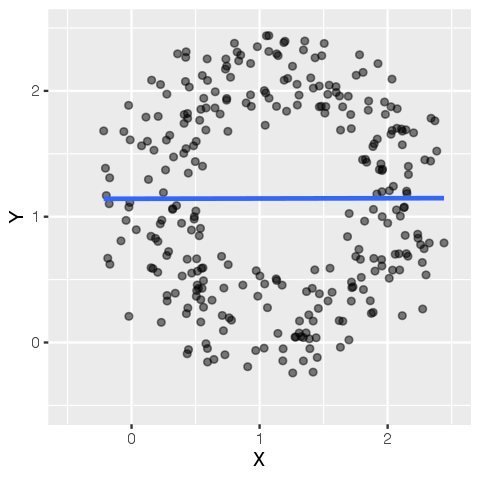

In [47]:
circle_plot

### and this:

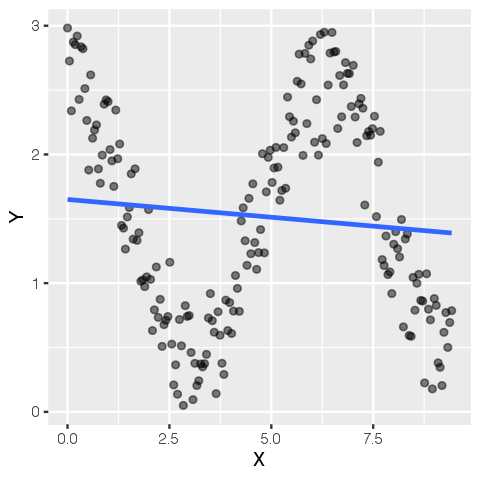

In [51]:
zigzag_plot